# Итоговая работа по Математике

## 1. Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as sts
from scipy.stats import ks_2samp
from scipy.stats import gaussian_kde
from itertools import combinations


import matplotlib.pyplot as plt
import mplcyberpunk
import plotly.express as px

In [2]:
plt.style.use("cyberpunk")

## 2. Чтение данных

[Ссылка на датасет](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 3. EDA

### Посмотрим на распределения данных относительно некоторых групп

#### 1. Door Number

Text(0.5, 1.0, 'столбец doornumber')

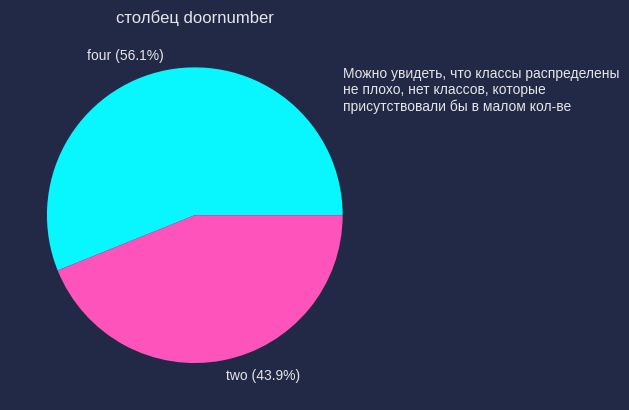

In [6]:
pie_vals_dependents = list(zip(data['doornumber'].value_counts().index, round(data['doornumber'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['doornumber'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Можно увидеть, что классы распределены
не плохо, нет классов, которые 
присутствовали бы в малом кол-ве
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец doornumber')

##### Распределения цены

Посмотрим на то, как распределена цена относительно группы

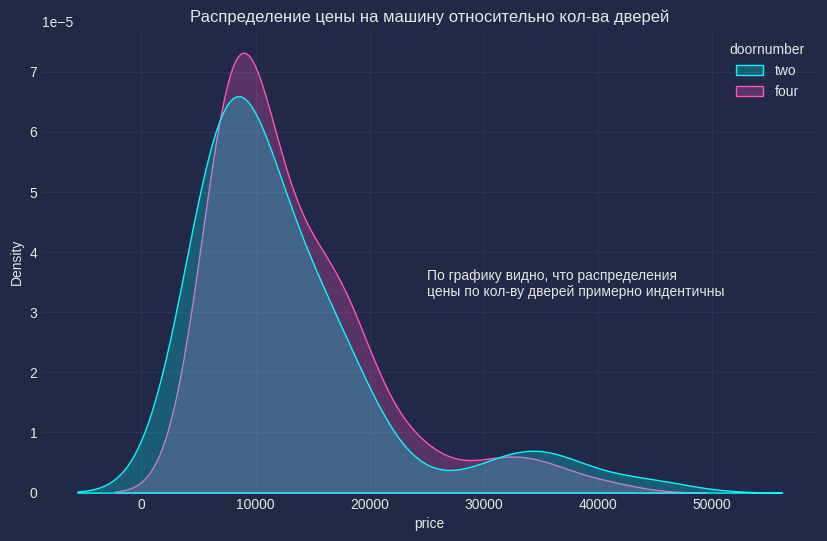

In [7]:
text_for_plot = """
По графику видно, что распределения
цены по кол-ву дверей примерно индентичны
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='doornumber', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно кол-ва дверей')
plt.text(25000, 3e-5, text_for_plot)

plt.show()


Сформулируем гипотезу:
- $H_0:$ Распределения совпадают
- $H_1:$ Распределения не совпадают

Проведем KS-тест, для проверки нашей гипотезы. Проверим её при уровне значимости $\alpha = 0.05$

In [8]:
group1_data = data[data['doornumber'] == 'two']['price']
group2_data = data[data['doornumber'] == 'four']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.16521739130434782, p-value: 0.11081160547163284


Из теста можно сделать вывод о том, что распределения совпадают, так как значение `p-value` $\approx 0.11 > 0.05 = \alpha$

Можно предположить, что отстутсвие статически значимой разницы вызвано тем, что кол-во дверей не влияет значительным образом на распределение цены

##### Распределения длины автомобиля

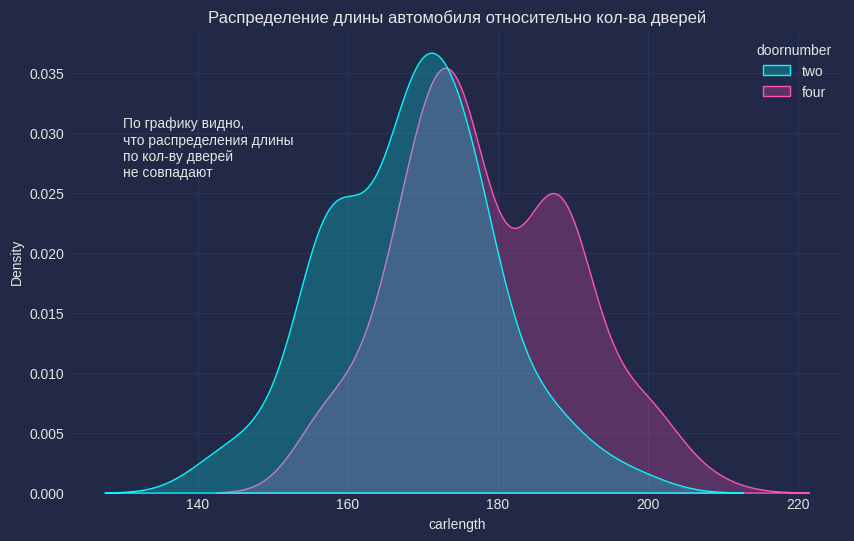

In [9]:
text_for_plot = """
По графику видно, 
что распределения длины 
по кол-ву дверей 
не совпадают
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='carlength', hue='doornumber', fill=True, common_norm=False)
plt.title('Распределение длины автомобиля относительно кол-ва дверей')
plt.text(130, 0.025, text_for_plot)

plt.show()


Снова проведем KS-тест, для проверки гипотезы о том, что распределения совпадают. Проверим её при уровне значимости $\alpha = 0.05$

In [10]:
group1_data = data[data['doornumber'] == 'two']['carlength']
group2_data = data[data['doornumber'] == 'four']['carlength']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.3753623188405797, p-value: 7.265510408251192e-07


Из теста можно убедиться в том, что распределения не совпадают, так как значение `p-value` $\approx 7*10^{-7} < 0.05 = \alpha$

Проверим является ли разница средних в этой группе статистически значимой.
Сформулируем гипотезу:
- $H_0:$ Нет статистически значимых различий между выборками
- $H_1:$ Присутствуют статистически значимые различия между выборками

Для этого проведем тест Манна-Уитни при уровне значимости $\alpha = 0.05$ (так как распределение не похоже на нормальное). 

In [11]:
statistic, p_value = sts.mannwhitneyu(group1_data, group2_data)
print(f'MW statistic: {statistic}, p-value: {p_value}')

MW statistic: 2877.5, p-value: 4.986172954761242e-08


Из теста можно сделать вывод о том, что в выборках нет статистически значимых различий, т.к. `p-value` $\approx 0.09 > 0.05 = \alpha$

Построим точную оценку разницы групп:

In [12]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: -9.88425120772942


Построим интервальную оценку для разницы групп:

In [13]:
bootstrapped_diffs = []
for _ in range(1000):
    bootstrap_sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    bootstrap_sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    bootstrapped_diffs.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))

lower_ci, upper_ci = np.percentile(bootstrapped_diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

Интервальная оценка разницы между группами: (-13.14, -6.64)


Визуализируем оценки:

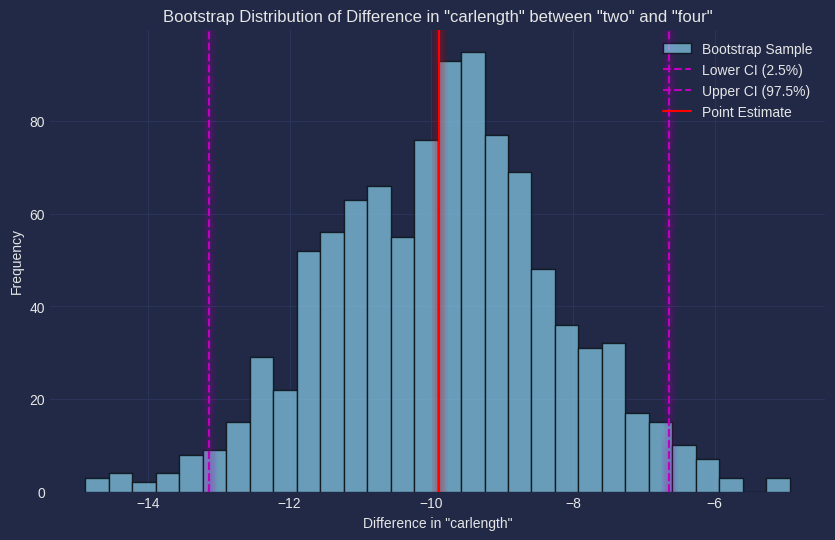

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='Upper CI (97.5%)')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Point Estimate')
plt.title(f'Bootstrap Distribution of Difference in "carlength" between "two" and "four"')
plt.xlabel(f'Difference in "carlength"')
plt.ylabel('Frequency')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

В заключении, логично будет предположить, что чем больше дверей у машины, тем больше её длина.

#### 2. Engine Location

Text(0.5, 1.0, 'столбец enginelocation')

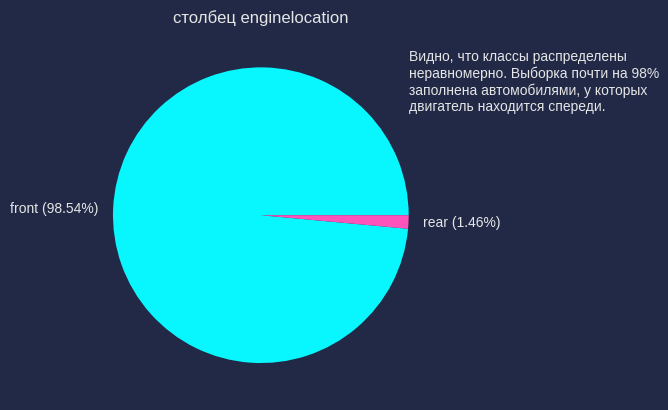

In [15]:
pie_vals_dependents = list(zip(data['enginelocation'].value_counts().index, round(data['enginelocation'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['enginelocation'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Видно, что классы распределены
неравномерно. Выборка почти на 98%
заполнена автомобилями, у которых 
двигатель находится спереди.
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец enginelocation')

##### Распределения цены

Посмотрим на то, как в данных группах распределена цена на автомобиль.

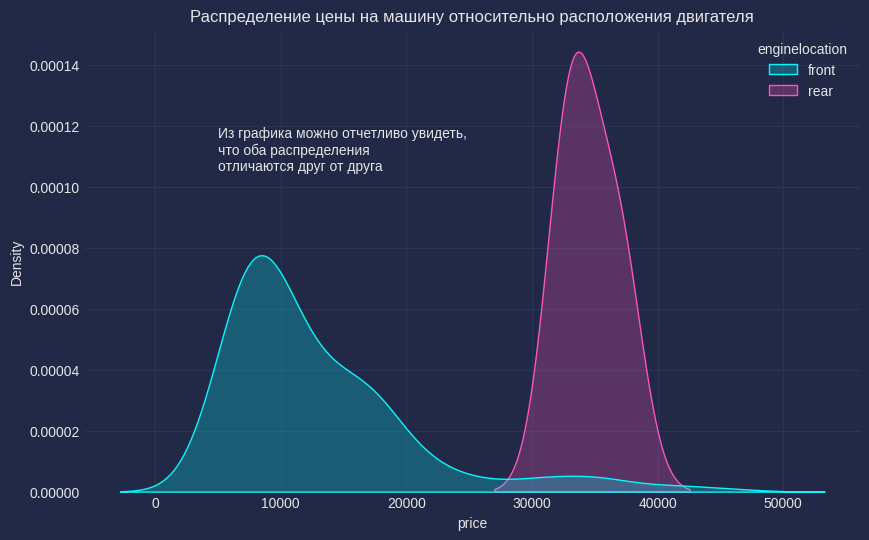

In [16]:
text_for_plot = """
Из графика можно отчетливо увидеть,
что оба распределения 
отличаются друг от друга
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='enginelocation', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно расположения двигателя')
plt.text(5000, 10e-5, text_for_plot)

plt.show()

Для проверки достоверности наших предположений, воспользуемя KS-тестом

In [17]:
group1_data = data[data['enginelocation'] == 'front']['price']
group2_data = data[data['enginelocation'] == 'rear']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.9603960396039604, p-value: 0.00023323038214444745


Значение p-value получилось очень маленьким, что подтверждает наши выводы из графиков

Объяснить такую разницу можно тем, что скорее всего двигатель расположен сзади у автомобилей Premium класс или класса Sport, а цена таких авто обычно выше. Проверить это можно следующим образом: добавить новый признак "Auto_Class" и посмотреть на корреляцию цены автомобилей, у которых двигатель сзади, с автомобилями класса Premium (Sport).

#### 3. Fuel Type

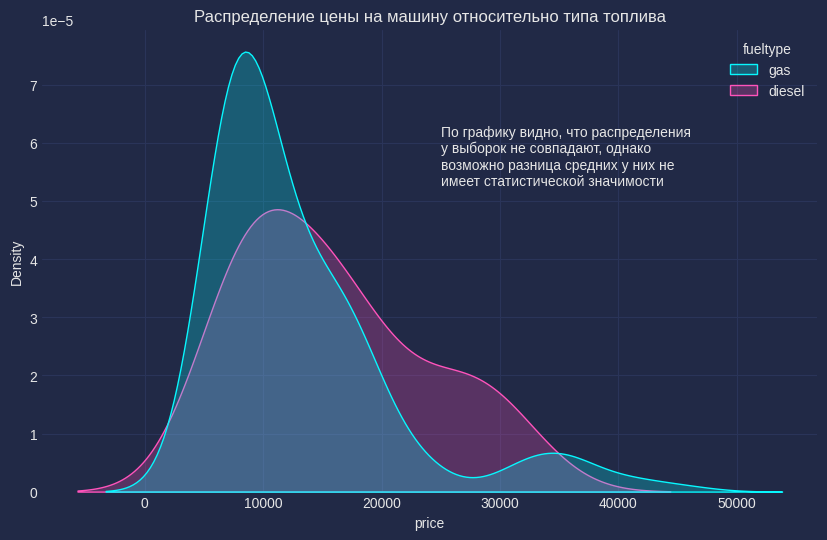

In [18]:
text_for_plot = """
По графику видно, что распределения
у выборок не совпадают, однако
возможно разница средних у них не 
имеет статистической значимости
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='fueltype', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно типа топлива')
plt.text(25000, 5e-5, text_for_plot)

plt.show()

Для начала проведем KS-тест, для проверки гипотезы о том, что распределения не совпадают. Проверим её при уровне значимости $\alpha = 0.05$

In [19]:
group1_data = data[data['fueltype'] == 'gas']['price']
group2_data = data[data['fueltype'] == 'diesel']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.25, p-value: 0.17609050630204018


Т.к. `p-value` $\approx 0.176 > 0.05 = \alpha \Rightarrow $ распределения не совпадают

Далее проверим является ли разница средних в этой группе статистически значимой.

In [20]:
statistic, p_value = sts.mannwhitneyu(group1_data, group2_data)
print(f'MW statistic: {statistic}, p-value: {p_value}')

MW statistic: 1347.0, p-value: 0.04616736846226526


Т.к. `p-value` $\approx 0.046 < 0.05 = \alpha \Rightarrow $ есть статистически значимые различия в выборке.

Точная оценка

In [21]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: -2838.3518000000004


Интервальные оценки

In [22]:
bootstrapped_diffs = []
for _ in range(1000):
    bootstrap_sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    bootstrap_sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    bootstrapped_diffs.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))

lower_ci, upper_ci = np.percentile(bootstrapped_diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

Интервальная оценка разницы между группами: (-6482.84, 418.8)


Визуализируем оценки:

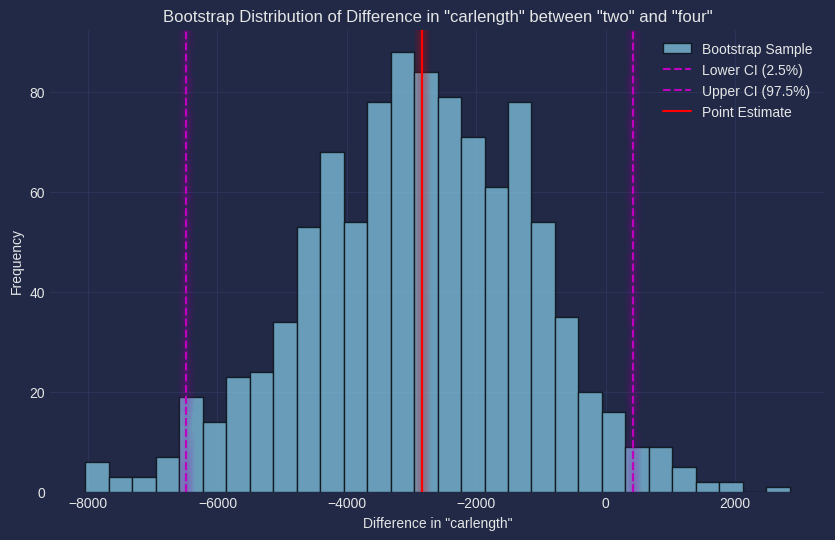

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='Upper CI (97.5%)')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Point Estimate')
plt.title(f'Bootstrap Distribution of Difference in "carlength" between "two" and "four"')
plt.xlabel(f'Difference in "carlength"')
plt.ylabel('Frequency')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

Можно предположить что разница в выборках объясняется тем, что в среднем автомобили на дизиле стоят дороже чем автомобили на бензине.

### Расмотрим оставшиеся признаки

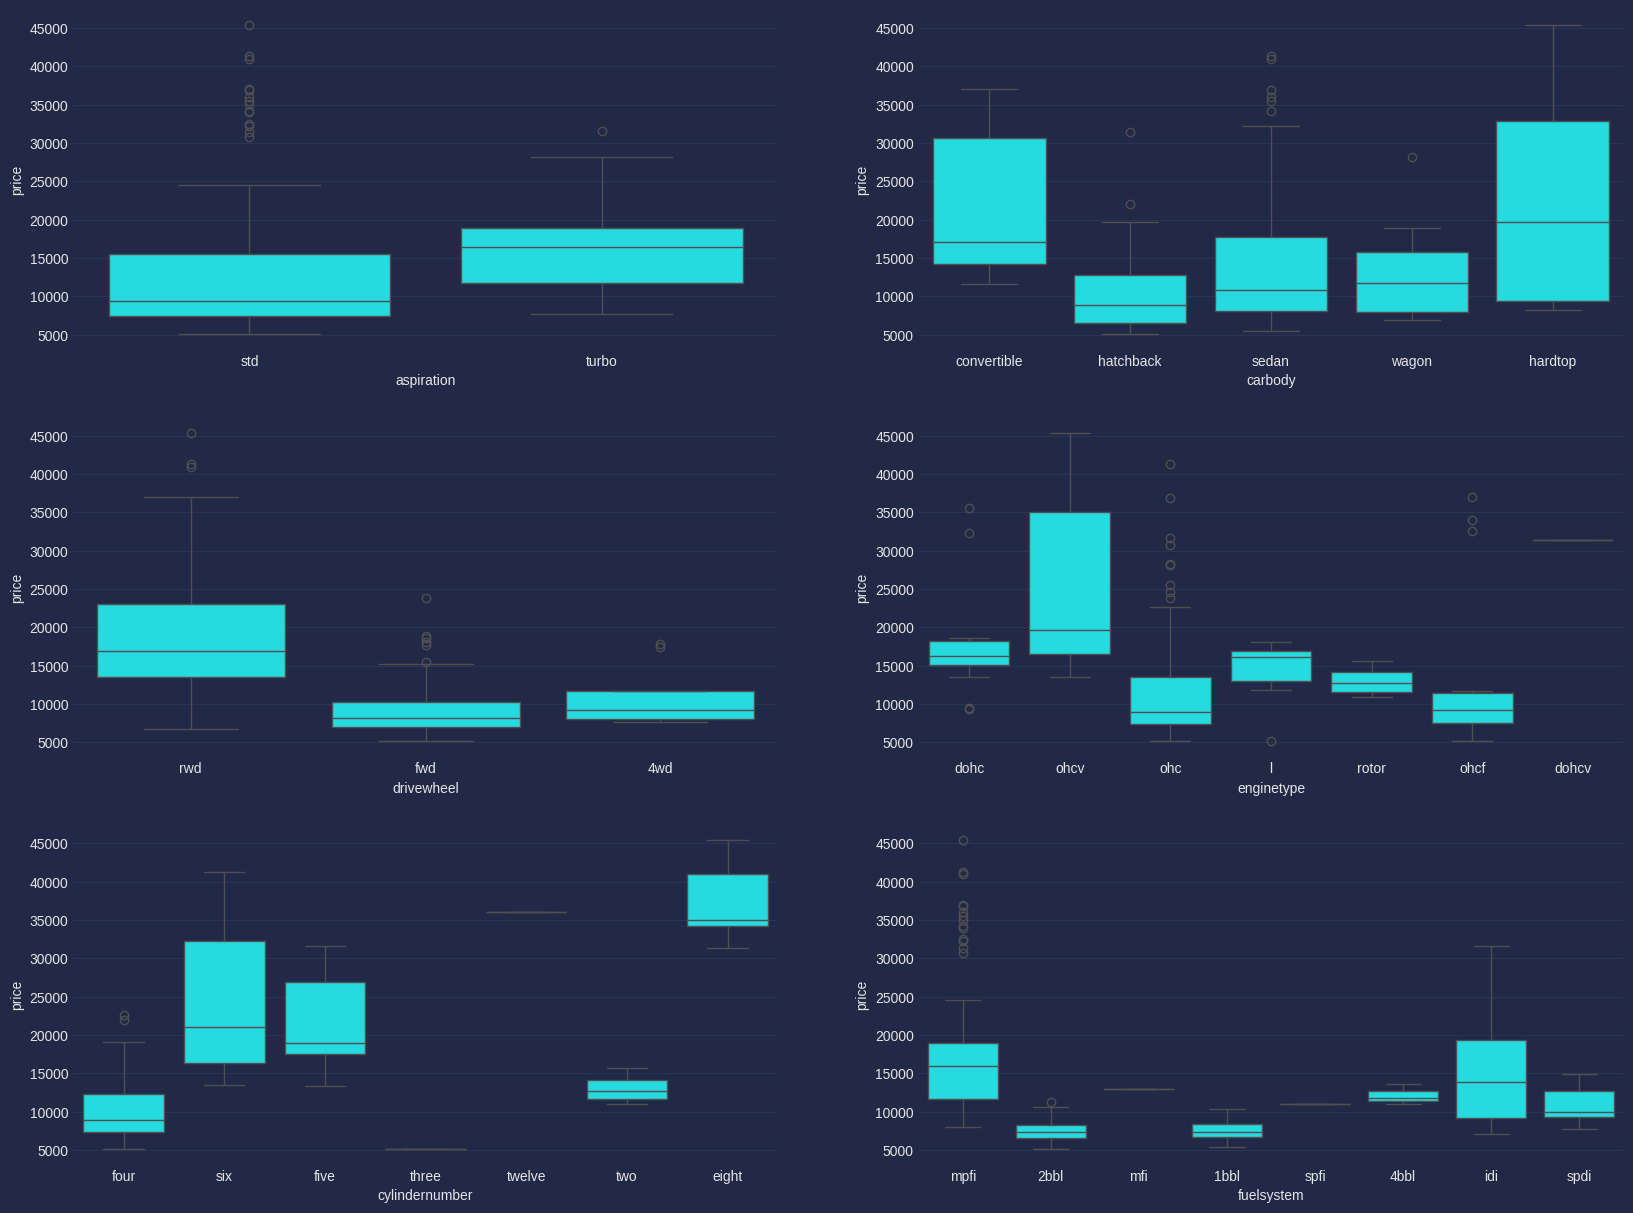

In [32]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

Выводы из полученных графиков:
- Все типы кузова автомобилей относительно дешевые. Выделяются только "Convertible" и "Hardtop";
- Цена на автомобили с задним приводом выше всех остальных;
- Присутствует небольная зависимость цены от числа поршней в двигателе;

### Исследуем на мультиколлинеарность

Выпишем признаки численные признаки

In [33]:
num_cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','horsepower','peakrpm','citympg','price']

Построим матрицу корреляции для численных признаков

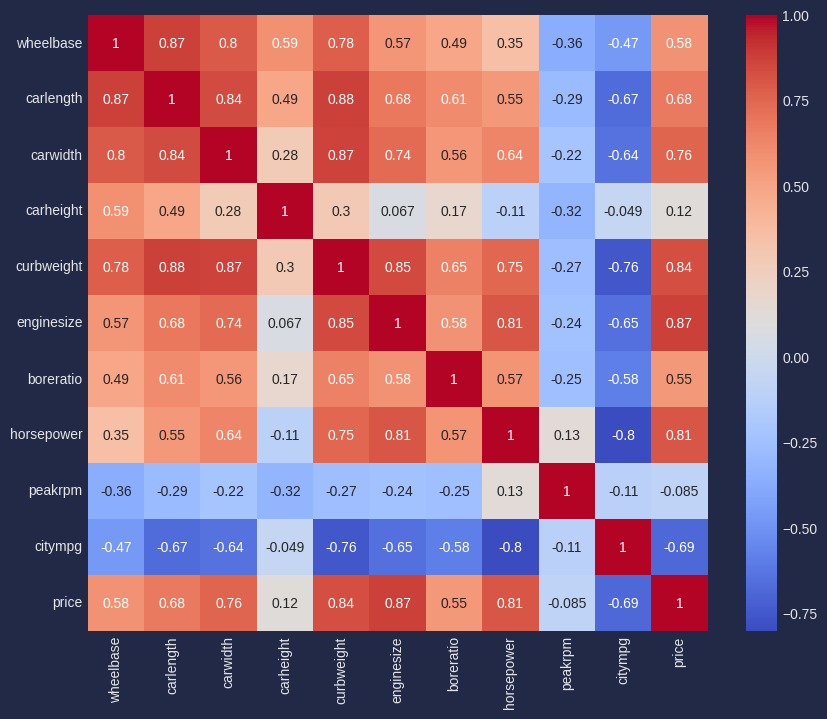

In [40]:
cor = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, cmap='coolwarm', annot=True);

Можно увидеть, что есть признаки, у которых довольно высокий показатель корреляции. Возможно не стоит учитывать такие признаки при построении модели.